<a href="https://colab.research.google.com/github/Paolatae2505/Practicas-AA/blob/master/Examen3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXAMEN 3
Vargas Bravo Paola 318074755

Illescas Coria Janet

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Punto 1

In [2]:
X  = pd.read_csv('train.csv')

In [3]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [4]:
X_num = X.select_dtypes(include=['number'])

In [5]:
X_num = X_num.fillna(X_num.mean())

In [6]:
Q1 = X_num.quantile(0.25)
Q3 = X_num.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = ((X_num < lower_bound) | (X_num > upper_bound)).any(axis=1)
if outliers.any():
    print("Datos atípicos encontrados:")
    print(X_num[outliers])
    X_num = X_num[~outliers]
else:
    print("No se encontraron datos atípicos.")

Datos atípicos encontrados:
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         

In [7]:
X_num

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1
12,0.278457,-0.020415,-0.112732,-0.999135,-0.984680,-0.996274,-0.999077,-0.982937,-0.996410,-0.943906,...,-0.686389,-0.878751,-0.077552,-0.101222,0.639084,0.765485,-0.850654,0.187611,-0.035998,1
17,0.280135,-0.013917,-0.106370,-0.997695,-0.987516,-0.990407,-0.998014,-0.987954,-0.992190,-0.942076,...,-0.328899,-0.596861,-0.028332,0.092367,-0.822239,0.367557,-0.759363,0.264033,0.029664,1
21,0.277152,-0.017983,-0.106601,-0.997763,-0.989957,-0.996586,-0.998291,-0.989669,-0.996700,-0.941472,...,-0.848198,-0.950247,-0.002320,0.150391,0.142331,-0.853711,-0.762023,0.262170,0.029987,1
35,0.270908,-0.014413,-0.106522,-0.993856,-0.993179,-0.993470,-0.993878,-0.992131,-0.992788,-0.941617,...,-0.430744,-0.823181,0.064398,0.300924,0.117655,-0.046455,-0.316732,-0.217729,-0.323329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,0.278204,-0.016106,-0.110522,-0.999717,-0.992924,-0.986699,-0.999616,-0.991570,-0.985084,-0.942852,...,-0.541634,-0.831776,0.050746,0.225696,0.211738,0.175778,-0.768507,0.129963,-0.146586,30
7026,0.278151,-0.015879,-0.112355,-0.998946,-0.990229,-0.987594,-0.999126,-0.989396,-0.985982,-0.942852,...,-0.577362,-0.836086,0.098523,0.866288,-0.126262,0.056808,-0.769274,0.129801,-0.146061,30
7027,0.277028,-0.017123,-0.111366,-0.997856,-0.992382,-0.987840,-0.997916,-0.992066,-0.986415,-0.944808,...,-0.812395,-0.936835,0.221331,-0.127942,0.128167,-0.097097,-0.770677,0.129276,-0.145152,30
7217,0.279277,-0.013380,-0.106030,-0.995466,-0.989060,-0.991667,-0.995922,-0.989787,-0.991401,-0.936897,...,-0.575823,-0.820962,-0.161015,0.182354,-0.447696,0.001221,-0.743932,0.088252,-0.167836,30


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

#Paso 2

In [8]:
pca = PCA()
pca = pca.fit(X_num)

In [9]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

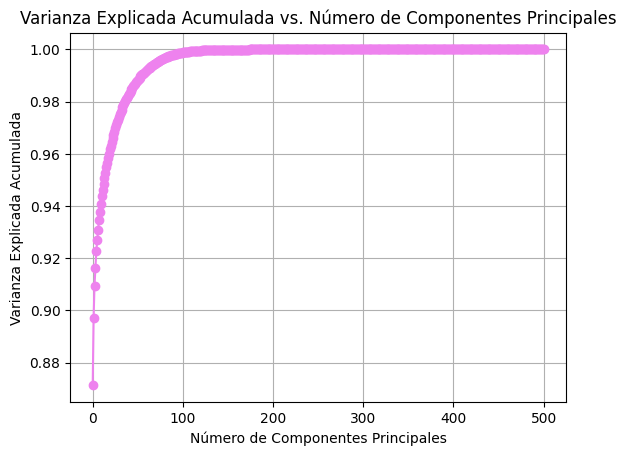

In [35]:
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color = 'violet')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes Principales')
plt.grid(True)
plt.show()

In [10]:
explained_variance_ratio

array([8.71235233e-01, 2.58678482e-02, 1.23100618e-02, 6.98546940e-03,
       6.29529992e-03, 4.18554558e-03, 4.00896150e-03, 3.76980935e-03,
       3.16960013e-03, 3.00063503e-03, 2.87926807e-03, 2.47015819e-03,
       2.30080223e-03, 2.23149094e-03, 2.07108098e-03, 1.99528605e-03,
       1.86987247e-03, 1.82488792e-03, 1.63874464e-03, 1.57395426e-03,
       1.45737685e-03, 1.39670626e-03, 1.36953171e-03, 1.32800038e-03,
       1.26730530e-03, 1.23635494e-03, 1.20403712e-03, 1.07984287e-03,
       1.06714863e-03, 1.00192442e-03, 9.68124152e-04, 9.40540847e-04,
       8.99888349e-04, 8.64074931e-04, 8.07347972e-04, 7.90592481e-04,
       7.38481511e-04, 7.23869720e-04, 7.05463966e-04, 6.78648978e-04,
       6.52017960e-04, 6.21316801e-04, 6.09274209e-04, 6.02774242e-04,
       5.90870063e-04, 5.77352541e-04, 5.41196567e-04, 5.26233545e-04,
       5.07135167e-04, 4.82487668e-04, 4.41630271e-04, 4.30683295e-04,
       4.25654506e-04, 4.17150108e-04, 3.92567233e-04, 3.79102043e-04,
      

In [11]:
cumulative_variance_ratio

array([0.87123523, 0.89710308, 0.90941314, 0.91639861, 0.92269391,
       0.92687946, 0.93088842, 0.93465823, 0.93782783, 0.94082846,
       0.94370773, 0.94617789, 0.94847869, 0.95071018, 0.95278126,
       0.95477655, 0.95664642, 0.95847131, 0.96011006, 0.96168401,
       0.96314139, 0.96453809, 0.96590762, 0.96723562, 0.96850293,
       0.96973929, 0.97094332, 0.97202317, 0.97309031, 0.97409224,
       0.97506036, 0.9760009 , 0.97690079, 0.97776487, 0.97857221,
       0.97936281, 0.98010129, 0.98082516, 0.98153062, 0.98220927,
       0.98286129, 0.98348261, 0.98409188, 0.98469465, 0.98528552,
       0.98586288, 0.98640407, 0.98693031, 0.98743744, 0.98791993,
       0.98836156, 0.98879224, 0.9892179 , 0.98963505, 0.99002762,
       0.99040672, 0.99076872, 0.99112367, 0.99146239, 0.99179524,
       0.9921085 , 0.99241959, 0.9927207 , 0.99301107, 0.99329749,
       0.99356669, 0.99382471, 0.99407575, 0.99432318, 0.99456076,
       0.99478983, 0.99501478, 0.9952335 , 0.99543941, 0.99564

In [12]:
desired_variance_ratio = 0.90
num_components = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

In [13]:
print(f"Número de componentes principales para retener {desired_variance_ratio * 100}% de la varianza total: {num_components}")

Número de componentes principales para retener 90.0% de la varianza total: 3


In [14]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_num)

In [36]:
X_pca

array([[ 17.51240292,  -0.11372347,  -0.83574053],
       [ 17.49901417,  -2.29001393,  -0.11350588],
       [ 17.52130985,  -0.38465834,  -0.82861328],
       ...,
       [-11.5108409 ,  -1.53517232,   0.57409535],
       [-11.46817536,  -1.0764477 ,  -0.59214473],
       [-11.48016333,   0.76651578,   1.22317252]])

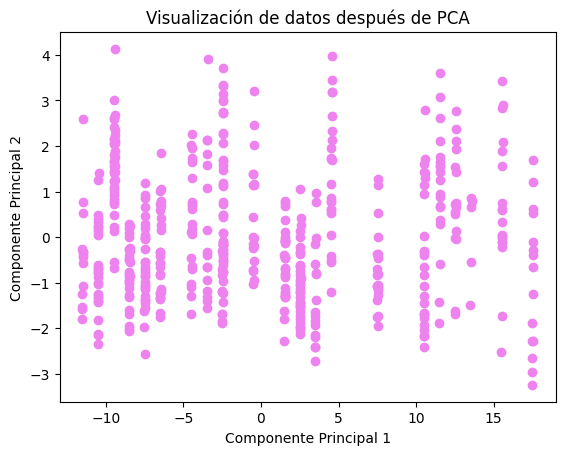

In [16]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='violet')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de datos después de PCA')

plt.show()

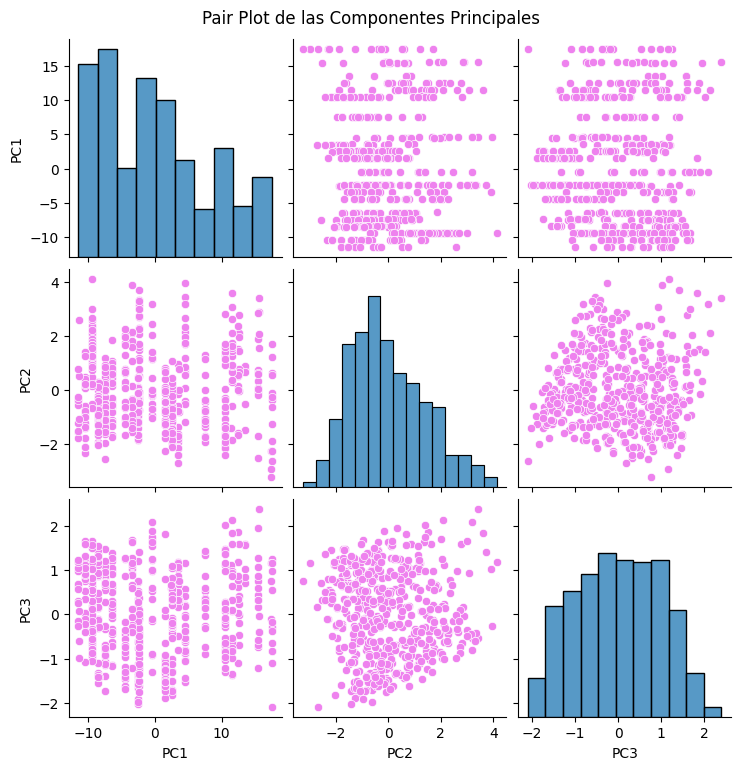

In [17]:
import seaborn as sns


pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

sns.pairplot(pca_df, plot_kws={'color':'violet'})

plt.suptitle('Pair Plot de las Componentes Principales', y=1.02)
plt.show()

In [27]:
from scipy import stats

def plot_histograms(df):
    df.hist(bins=30, figsize=(5,5), color='violet')
    plt.suptitle('Histograms of Features', fontsize=20)
    plt.show()

def plot_qqplots(df):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(5, 4, i)
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(column)
    plt.tight_layout()
    plt.suptitle('Q-Q Plots of Features', fontsize=20)
    plt.subplots_adjust(top=0.95)
    plt.show()

def normality_tests(df):
    normality_results = {}
    for column in df.columns:
        stat, p_value = stats.shapiro(df[column].dropna())
        normality_results[column] = p_value
    return normality_results



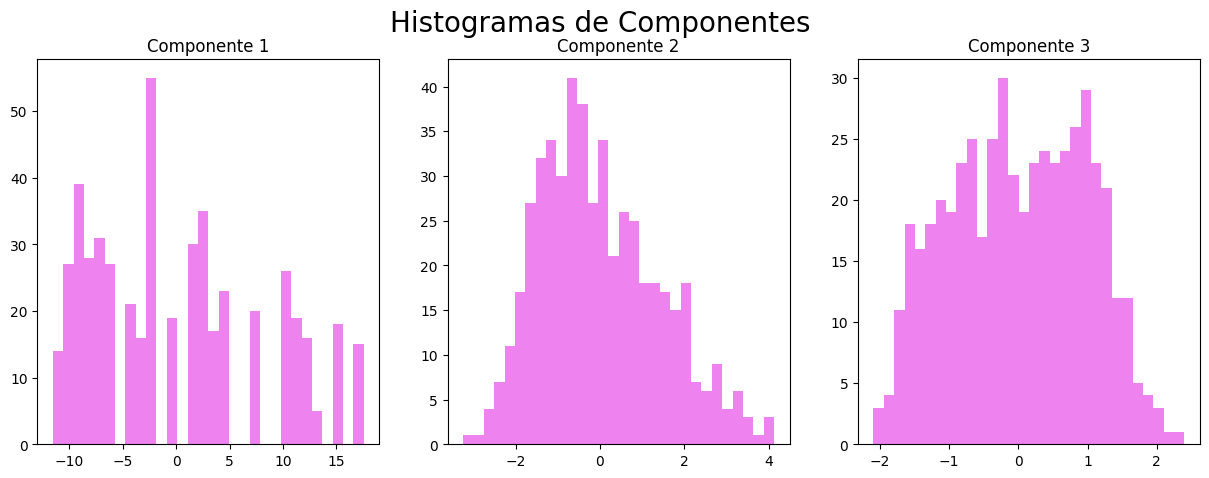

In [31]:
import matplotlib.pyplot as plt

def plot_histograms(X_pca):
    num_features = X_pca.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

    for i in range(num_features):
        axes[i].hist(X_pca[:, i], bins=30, color='violet')
        axes[i].set_title(f'Componente {i+1}')

    plt.suptitle('Histogramas de Componentes', fontsize=20)
    plt.show()

plot_histograms(X_pca)

In [32]:
from scipy.stats import shapiro

def check_normality(X_pca):
    normality_results = {}
    for i in range(X_pca.shape[1]):
        feature = X_pca[:, i]
        _, p_value = shapiro(feature)
        normality_results[f'Componente {i+1}'] = p_value
    return normality_results

normality_results = check_normality(X_pca)
for feature, p_value in normality_results.items():
    if p_value < 0.05:
        print(f'{feature} no sigue una distribución normal (p < 0.05)')
    else:
        print(f'{feature} sigue una distribución normal (p >= 0.05)')

Componente 1 no sigue una distribución normal (p < 0.05)
Componente 2 no sigue una distribución normal (p < 0.05)
Componente 3 no sigue una distribución normal (p < 0.05)


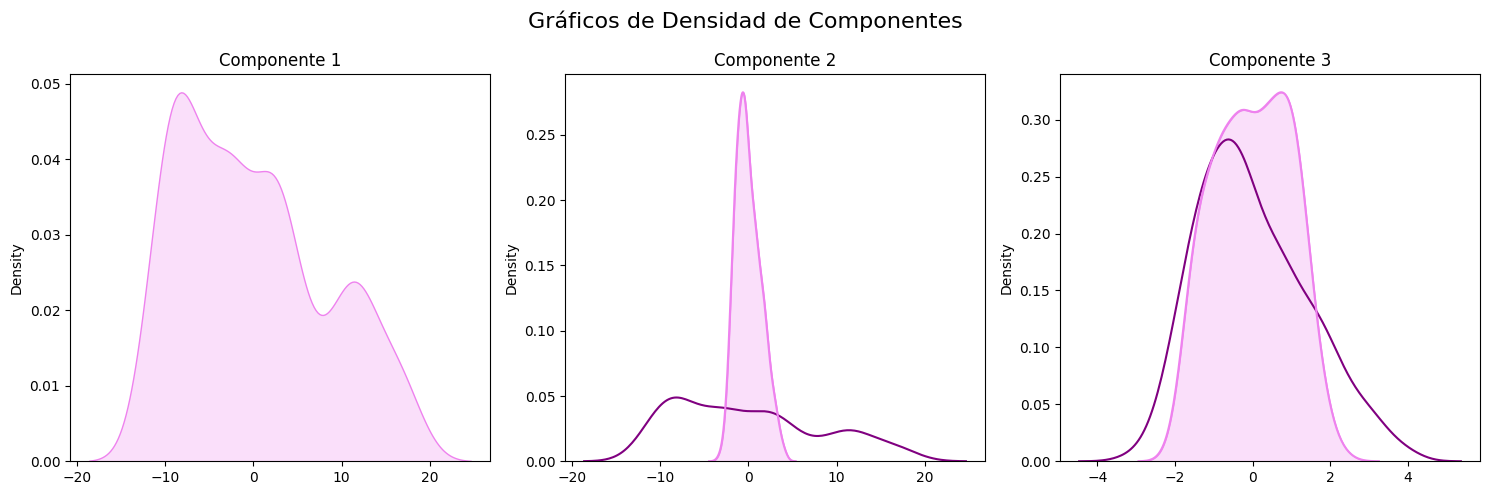

No hay variabilidad en la densidad entre las dimensiones.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def check_density_variation(X_pca):
    density_variation = False
    num_features = X_pca.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

    for i in range(num_features):
        feature = X_pca[:, i]
        sns.kdeplot(feature, ax=axes[i], color='violet', fill=True)
        axes[i].set_title(f'Componente {i+1}')

        if i > 0:
            prev_density = sns.kdeplot(X_pca[:, i-1], color='purple', fill=False, ax=axes[i])
            curr_density = sns.kdeplot(feature, color='violet', fill=False, ax=axes[i])
            if prev_density.get_lines()[0].get_data()[1].max() != curr_density.get_lines()[0].get_data()[1].max():
                density_variation = True

    fig.suptitle('Gráficos de Densidad de Componentes', fontsize=16)
    plt.tight_layout()
    plt.show()

    if density_variation:
        print("Hay variabilidad en la densidad entre las dimensiones.")
    else:
        print("No hay variabilidad en la densidad entre las dimensiones.")

check_density_variation(X_pca)



# Punto 3 y 4

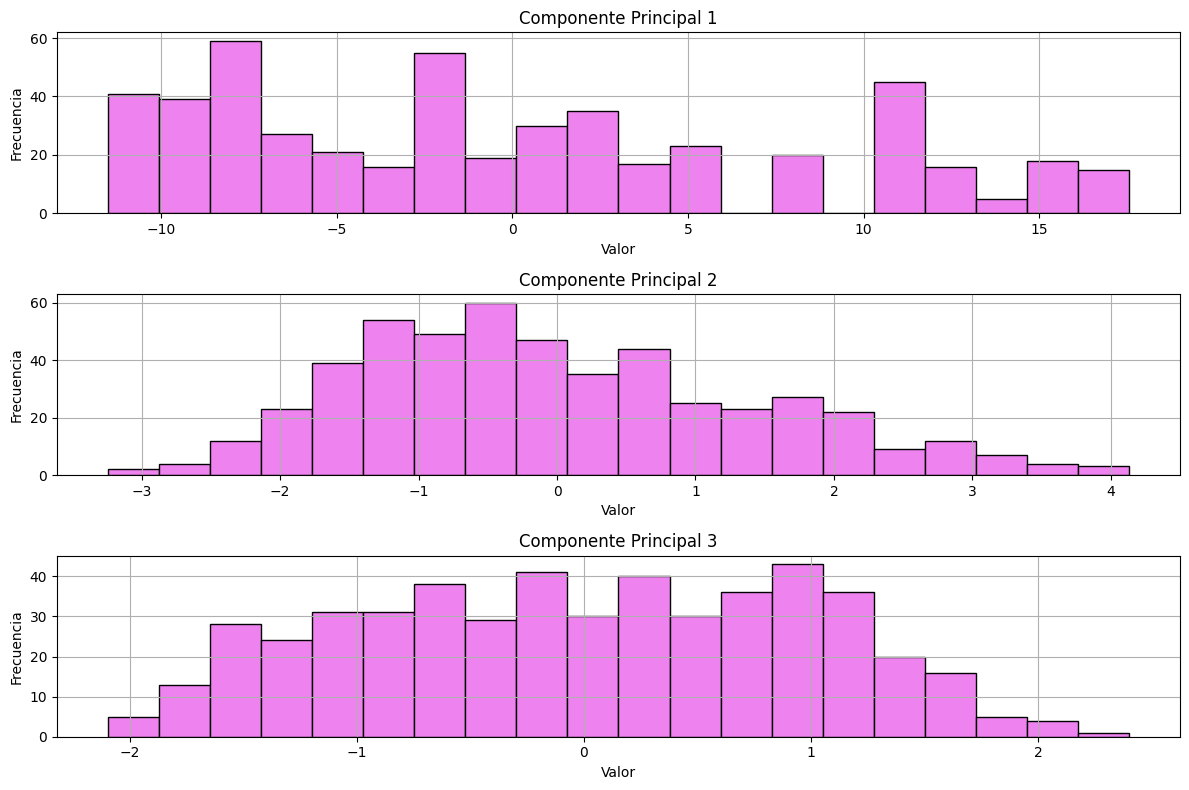

In [18]:
num_components = X_pca.shape[1]
num_bins = 20

plt.figure(figsize=(12, 8))
for i in range(num_components):
    plt.subplot(num_components, 1, i+1)
    plt.hist(X_pca[:, i], bins=num_bins, color='violet', edgecolor='black')
    plt.title(f'Componente Principal {i+1}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
num_components = X_pca.shape[1]
for i in range(num_components):
    print(f'Componente Principal {i+1}')
    print(X_pca[:, i])

Componente Principal 1
[ 17.51240292  17.49901417  17.52130985  17.50295435  17.50443874
  17.47774833  17.52395969  17.5445415   17.55229833  17.54806427
  17.53507862  17.5245441   17.51189359  17.48922036  17.52219161
  15.52747826  15.57526948  15.56308691  15.55718074  15.54973782
  15.52403393  15.54370455  15.52058198  15.50666839  15.54812259
  15.54455014  15.53633863  15.54135075  15.536601    15.54609269
  15.57141025  15.50131796  15.51887184  13.57877965  13.49136918
  13.52380181  13.54832076  13.54184664  12.53363689  12.54797564
  12.52110271  12.50754163  12.57207468  12.55404428  12.54230902
  12.51111068  12.50329402  12.55189057  12.55161141  12.57206584
  12.54572207  12.52943841  12.54027233  12.55786239  11.55099009
  11.52714269  11.53885251  11.5323858   11.55519845  11.5445535
  11.54639532  11.5469049   11.56430168  11.50621632  11.51730899
  11.48042207  11.55842716  11.56879933  11.54421078  11.5252211
  11.53566367  11.5358736   11.52327344  10.567563    1

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []
davies_bouldin_scores = []


for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    davies_bouldin_avg = davies_bouldin_score(X_pca, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [21]:
 wcss

[10738.760120698873,
 4818.230850281154,
 3095.898435570919,
 2437.3014389922105,
 2097.8102629825016,
 1814.202741927449,
 1658.3133755265778,
 1485.6249492650059,
 1323.2910095415918]

In [22]:
 silhouette_scores

[0.5761583256212877,
 0.550787130256012,
 0.5242100079117222,
 0.5005675239161141,
 0.4352261271232257,
 0.4203843210578507,
 0.4337536372897654,
 0.39590624852601325,
 0.40011153987448617]

In [23]:
davies_bouldin_scores

[0.6058633547201308,
 0.5926214371106548,
 0.6519469462302964,
 0.7346103128276974,
 0.8647930821099092,
 0.9133278333646447,
 0.8166010964158965,
 0.9856943661472228,
 0.9391046995833078]

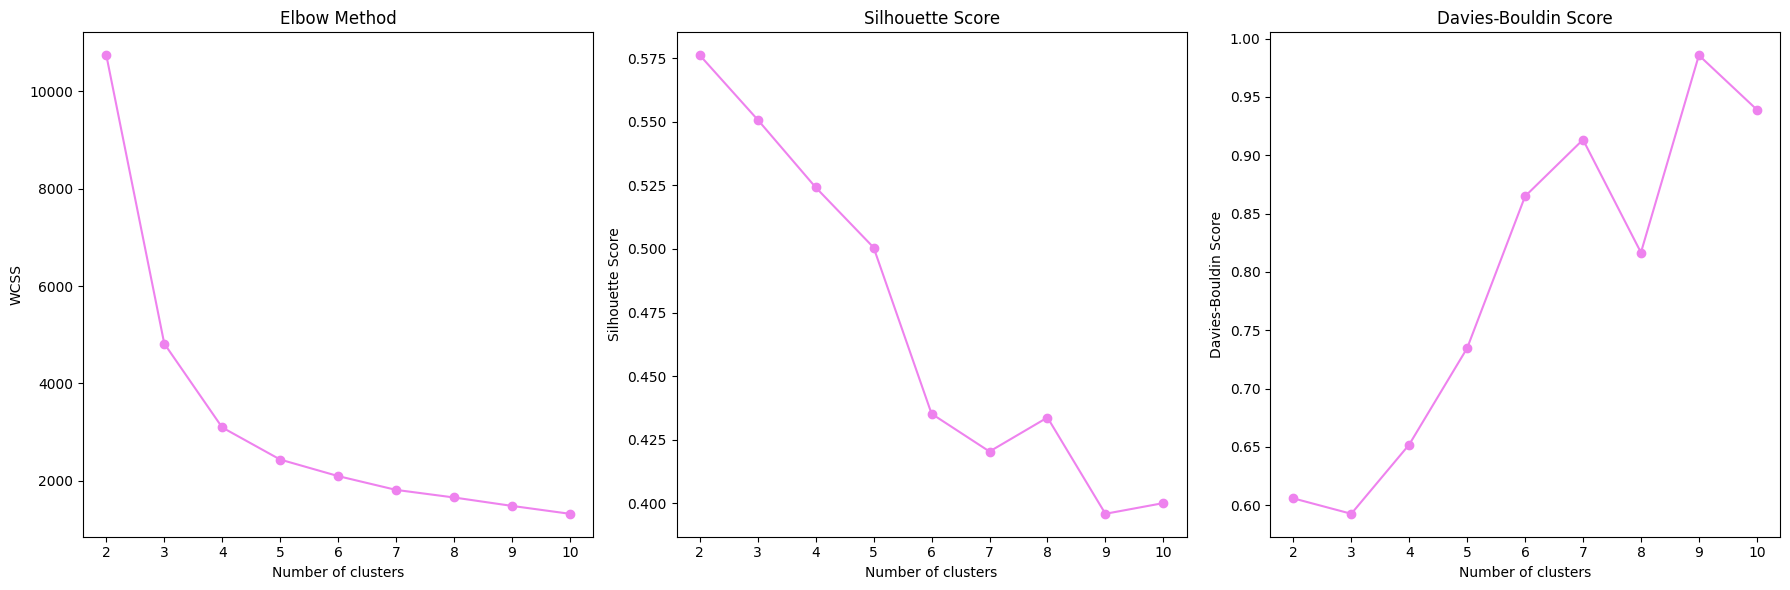

In [24]:

plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.plot(range(2, 11), wcss, marker='o', color='violet')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS o SSE

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='violet')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


plt.subplot(1, 3, 3)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', color='violet')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()
